In [1]:
# ライブラリの読み込み
import networkx as nx
import numpy as np

import random

random.seed(246)

In [2]:
# Graphインスタンスの初期化
G = nx.Graph()

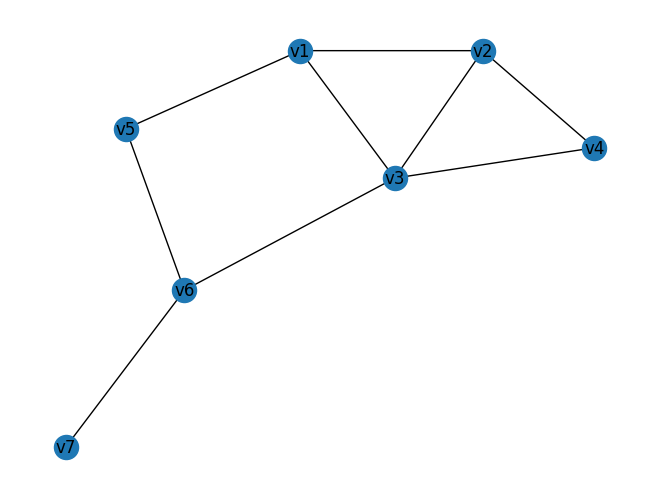

In [3]:
# エッジリストからGraphオブジェクトの作成
edge_list = [
    ("v1", "v2"),
    ("v1", "v3"),
    ("v1", "v5"),
    ("v2", "v3"),
    ("v2", "v4"),
    ("v3", "v4"),
    ("v3", "v6"),
    ("v5", "v6"),
    ("v6", "v7"),
]

G = nx.Graph(edge_list)
nx.draw(G, with_labels=True)

In [4]:
# ノード一覧の確認
print(G.nodes())
# ノードに付随する情報も合わせて確認。（ここでは空）
print(G.nodes(data=True))

# エッジ一覧の確認
print(G.edges())
# エッジに付随する情報も合わせて確認。（ここでは空）
print(G.edges(data=True))

['v1', 'v2', 'v3', 'v5', 'v4', 'v6', 'v7']
[('v1', {}), ('v2', {}), ('v3', {}), ('v5', {}), ('v4', {}), ('v6', {}), ('v7', {})]
[('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v3'), ('v2', 'v4'), ('v3', 'v4'), ('v3', 'v6'), ('v5', 'v6'), ('v6', 'v7')]
[('v1', 'v2', {}), ('v1', 'v3', {}), ('v1', 'v5', {}), ('v2', 'v3', {}), ('v2', 'v4', {}), ('v3', 'v4', {}), ('v3', 'v6', {}), ('v5', 'v6', {}), ('v6', 'v7', {})]


In [5]:
# 命名の対応を作成する
mapping = {
    "v1": "a",
    "v2": "b",
    "v3": "c",
}

# 命名の対応にしたがって名前をつける
H = nx.relabel_nodes(G, mapping)
print(H.nodes())

['a', 'b', 'c', 'v5', 'v4', 'v6', 'v7']


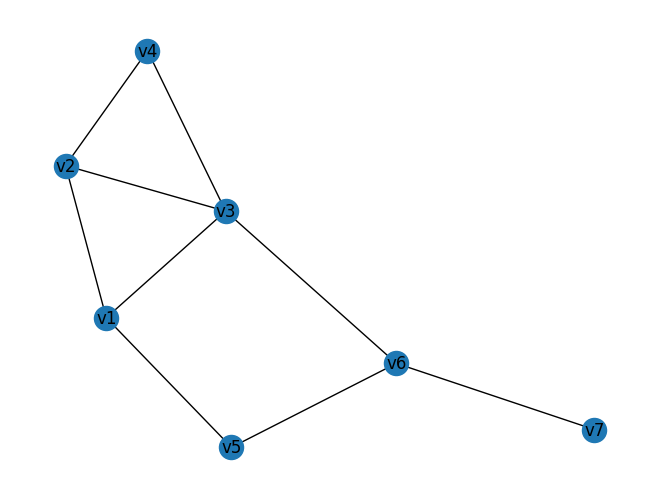

In [6]:
# 隣接リストの作成
adj_list = {
    "v1": ["v2", "v3", "v5"],
    "v2": ["v1", "v3", "v4"],
    "v3": ["v1", "v2", "v4", "v6"],
    "v4": ["v2", "v3"],
    "v5": ["v1", "v6"],
    "v6": ["v3", "v5", "v7"],
    "v7": ["v6"],
}

# 隣接リストからGraphオブジェクトの作成
G = nx.Graph(adj_list)
nx.draw(G, with_labels=True)

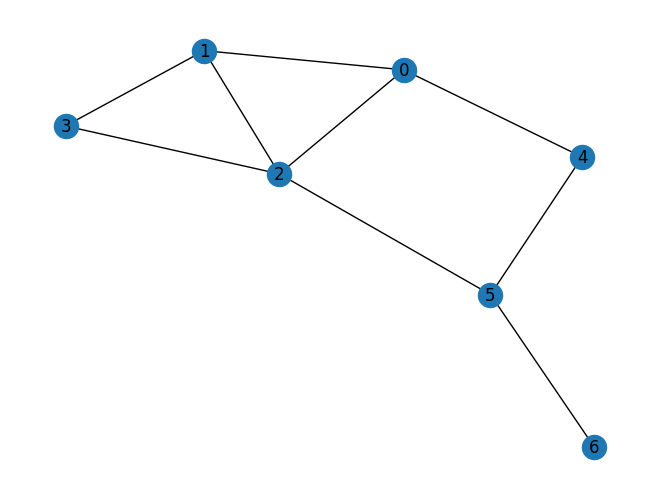

In [7]:
# 隣接行列の作成
adj_matrix = np.array(
    [
        [0, 1, 1, 0, 1, 0, 0],
        [1, 0, 1, 1, 0, 0, 0],
        [1, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0],
    ],
)

# 隣接行列からGraphオブジェクトの作成
G = nx.from_numpy_array(adj_matrix)
nx.draw(G, with_labels=True)